# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file
df = pd.read_parquet(r'C:\Users\jiniy\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [5]:
df.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [16]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\jiniy\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# Loop through each file in the list of files
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_month_data = pd.read_parquet(file_path)
        

        # Extract pickup date and hour from the tpep_pickup_datetime column
        current_month_data['pickup_date'] = current_month_data['tpep_pickup_datetime'].dt.date
        current_month_data['pickup_hour'] = current_month_data['tpep_pickup_datetime'].dt.hour

        # Initialize an empty DataFrame to store the sampled data for this month
        sampled_data = pd.DataFrame()

        # Loop through each unique date in the current month's data
        for date in current_month_data['pickup_date'].unique():
            # Filter data for the specific date
            date_data = current_month_data[current_month_data['pickup_date'] == date]

            # Loop through each hour of the day (0 to 23)
            for hour in range(24):
                # Filter data for the specific hour of the specific date
                hour_data = date_data[date_data['pickup_hour'] == hour]

                # Sample 5% of this hour's data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)

                # Append the sampled data for this hour to the sampled_data DataFrame
                sampled_data = pd.concat([sampled_data, sample])

        # After processing all the hours for this month, append the sampled data to the final DataFrame
        df = pd.concat([df, sampled_data])
        print(f"Processed {file_name} with {sampled_data.shape[0]} rows sampled.")

    except Exception as e:
        # Handle any errors (e.g., file reading errors)
        print(f"Error reading file {file_name}: {e}")

Processed 2023-1.parquet with 152087 rows sampled.
Processed 2023-10.parquet with 174255 rows sampled.
Processed 2023-11.parquet with 165133 rows sampled.
Processed 2023-12.parquet with 166709 rows sampled.
Processed 2023-2.parquet with 168696 rows sampled.
Processed 2023-3.parquet with 163786 rows sampled.
Processed 2023-4.parquet with 139641 rows sampled.
Processed 2023-5.parquet with 144458 rows sampled.
Processed 2023-6.parquet with 162910 rows sampled.
Processed 2023-7.parquet with 174068 rows sampled.
Processed 2023-8.parquet with 143782 rows sampled.
Processed 2023-9.parquet with 140875 rows sampled.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [7]:
# Store the df in csv/parquet
df.to_csv('sampled_data.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [8]:
# Load the new data file
df= pd.read_csv('sampled_data.csv')

In [9]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0         428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1        1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2         819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3        3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4     2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              NaN          19.24         NaN                NaN   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...      0.5        0.00           0.0   
1           161           237  ...      0.5        2.58           0.0   
2           237           141  ...      0.5        0.00           0.0   
3           143           142  ...      0.5        0.00           0.0   
4            66           107  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour  Airport_fee  
0   2023-01-01            0          NaN  
1   2023-01-01            0          NaN  
2   2023-01-01            0          NaN  
3   2023-01-01            0          NaN  
4   2023-01-01            0          NaN  

[5 rows x 23 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  pickup_date            object 
 21  pickup_hour            int64  
 22  Airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0','mta_tax','store_and_fwd_flag','tolls_amount'], inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Combine the two airport fee columns
df["airport_fee"].fillna(0.0, inplace=True)
df["Airport_fee"].fillna(0.0, inplace=True)

df['airport_fee_combined'] = df['airport_fee'] + df['Airport_fee']

# dropping
df.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  tip_amount  improvement_surcharge  total_amount  \
0        32.40    6.0        0.00                    1.0         41.15   
1         7.90    1.0        2.58                    1.0         15.48   
2        11.40    1.0        0.00                    1.0         16.40   
3         6.50    1.0        0.00                    1.0         11.50   
4        25.64    0.0        5.93                    1.0         35.57   

   congestion_surcharge pickup_date  pickup_hour  airport_fee_combined  
0                   0.0  2023-01-01            0                  1.25  
1                   2.5  2023-01-01            0                  0.00  
2                   2.5  2023-01-01            0                  0.00  
3                   2.5  2023-01-01            0                  0.00  
4                   NaN  2023-01-01            0                  0.00

In [13]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'pickup_date', 'pickup_hour', 'airport_fee_combined'],
      dtype='object')

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
df[df.fare_amount<0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee_combined]
Index: []

In [15]:
# check where values of fare amount are negative
negative_percentage_fare_amount = (df['fare_amount'] < 0.0).sum() / len(df) * 100.0
print(f"Percentage of negative values in 'fare_amount': {negative_percentage_fare_amount:.3f}%")

Percentage of negative values in 'fare_amount': 0.000%


Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_df = df[df['fare_amount'] < 0]
ratecode_analysis = negative_fare_df['RatecodeID'].value_counts()
print(ratecode_analysis)

Series([], Name: count, dtype: int64)


In [17]:
# Find which columns have negative values
pd.DataFrame({
    'Column': df.columns.values,
    'Negative-Value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns]
}).round(3)

Column  Negative-Value(%)
0                VendorID              0.000
1    tpep_pickup_datetime              0.000
2   tpep_dropoff_datetime              0.000
3         passenger_count              0.000
4           trip_distance              0.000
5              RatecodeID              0.000
6            PULocationID              0.000
7            DOLocationID              0.000
8            payment_type              0.000
9             fare_amount              0.000
10                  extra              0.000
11             tip_amount              0.000
12  improvement_surcharge              0.004
13           total_amount              0.004
14   congestion_surcharge              0.003
15            pickup_date              0.000
16            pickup_hour              0.000
17   airport_fee_combined              0.001

In [18]:
# fix these negative values
negative_cols = ['improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']
for col in negative_cols:
    df.loc[df[col] < 0, col] = df.loc[df[col] < 0, col].abs()
    
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  tip_amount  improvement_surcharge  total_amount  \
0        32.40    6.0        0.00                    1.0         41.15   
1         7.90    1.0        2.58                    1.0         15.48   
2        11.40    1.0        0.00                    1.0         16.40   
3         6.50    1.0        0.00                    1.0         11.50   
4        25.64    0.0        5.93                    1.0         35.57   

   congestion_surcharge pickup_date  pickup_hour  airport_fee_combined  
0                   0.0  2023-01-01            0                  1.25  
1                   2.5  2023-01-01            0                  0.00  
2                   2.5  2023-01-01            0                  0.00  
3                   2.5  2023-01-01            0                  0.00  
4                   NaN  2023-01-01            0                  0.00

In [19]:
pd.DataFrame({
    'Column': df.columns.values,
    'Negative-Value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns]
}).round(3)

Column  Negative-Value(%)
0                VendorID                0.0
1    tpep_pickup_datetime                0.0
2   tpep_dropoff_datetime                0.0
3         passenger_count                0.0
4           trip_distance                0.0
5              RatecodeID                0.0
6            PULocationID                0.0
7            DOLocationID                0.0
8            payment_type                0.0
9             fare_amount                0.0
10                  extra                0.0
11             tip_amount                0.0
12  improvement_surcharge                0.0
13           total_amount                0.0
14   congestion_surcharge                0.0
15            pickup_date                0.0
16            pickup_hour                0.0
17   airport_fee_combined                0.0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




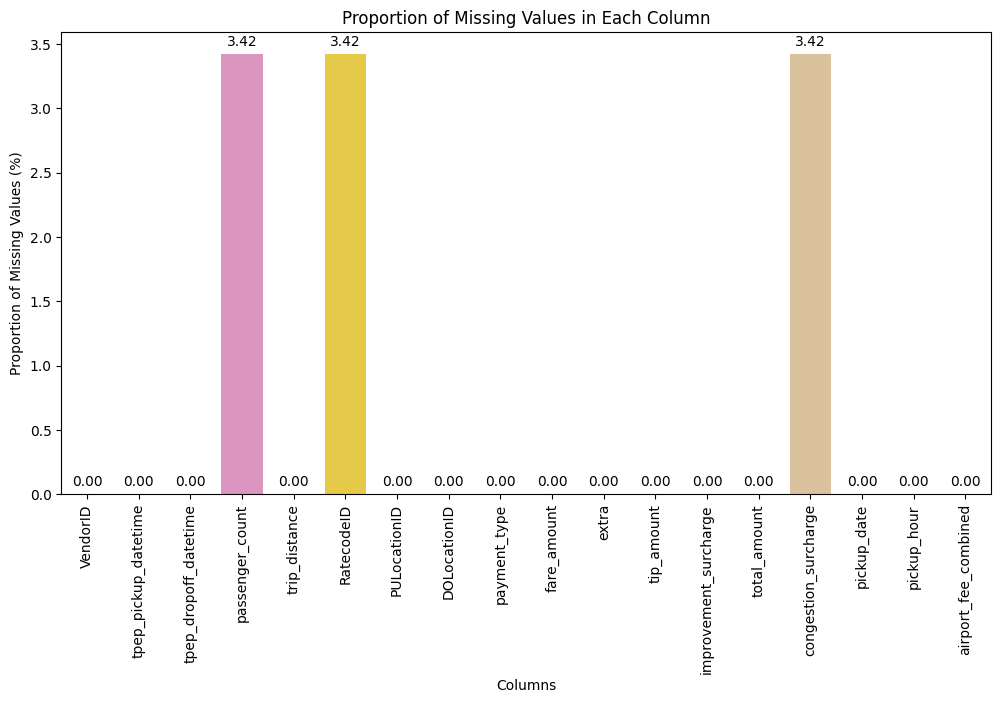

In [20]:
# Find the proportion of missing values in each column
def custom_bar_plot(x, y, title, xlabel, ylabel, figsize=(12, 6), show_data_labels=False):
    plt.figure(figsize=figsize)
    palette = sns.color_palette("Set2", len(x))  # Using a predefined palette (Set2 in this case)
    ax = sns.barplot(x=x, y=y, palette=palette)   
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    
    if show_data_labels:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), textcoords='offset points')
    
    plt.show()
missing_values = df.isna().mean() * 100
custom_bar_plot(missing_values.index, missing_values.values, 'Proportion of Missing Values in Each Column', 'Columns', 'Proportion of Missing Values (%)', show_data_labels=True)


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [21]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df["passenger_count"] = df["passenger_count"].astype(int)
print(f"Missing value (%) 'passenger_count': {df['passenger_count'].isna().mean() * 100}%")

Missing value (%) 'passenger_count': 0.0%


Did you find zeroes in passenger_count? Handle these.

In [22]:
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
print(f"Missing value (%) 'passenger_count': {(df['passenger_count'] == 0).sum() / len(df) * 100}%")

Missing value (%) 'passenger_count': 0.0%


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [23]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts()

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [24]:
# replace null with 1
df['RatecodeID'].fillna(1, inplace=True)
# replace 99.0 with 1
df['RatecodeID'] = df['RatecodeID'].replace(99.0, 1)
df["RatecodeID"] = df["RatecodeID"].astype(int)
df['RatecodeID'].value_counts()

RatecodeID
1    1804605
2      71670
5      10275
3       6124
4       3723
6          3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1690628
0.0     140897
0.5          1
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)

In [27]:
print(f"Missing value (%) 'congestion_surcharge': {df['congestion_surcharge'].isna().mean() * 100}%")
print(f"Missing value (%) 'passenger_count': {(df['passenger_count'] == 0).sum() / len(df) * 100}%")

Missing value (%) 'congestion_surcharge': 0.0%
Missing value (%) 'passenger_count': 0.0%


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896400e+06     1.896400e+06   1.896400e+06  1.896400e+06   
mean   1.733026e+00     1.372236e+00   3.858293e+00  1.071821e+00   
std    4.476401e-01     8.644038e-01   1.294085e+02  3.872343e-01   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.263605e+05  6.000000e+00   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.652814e+02  1.640515e+02  1.163817e+00  1.991935e+01  1.588018e+00   
std    6.400038e+01  6.980207e+01  5.081384e-01  1.055371e+02  1.829200e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00 

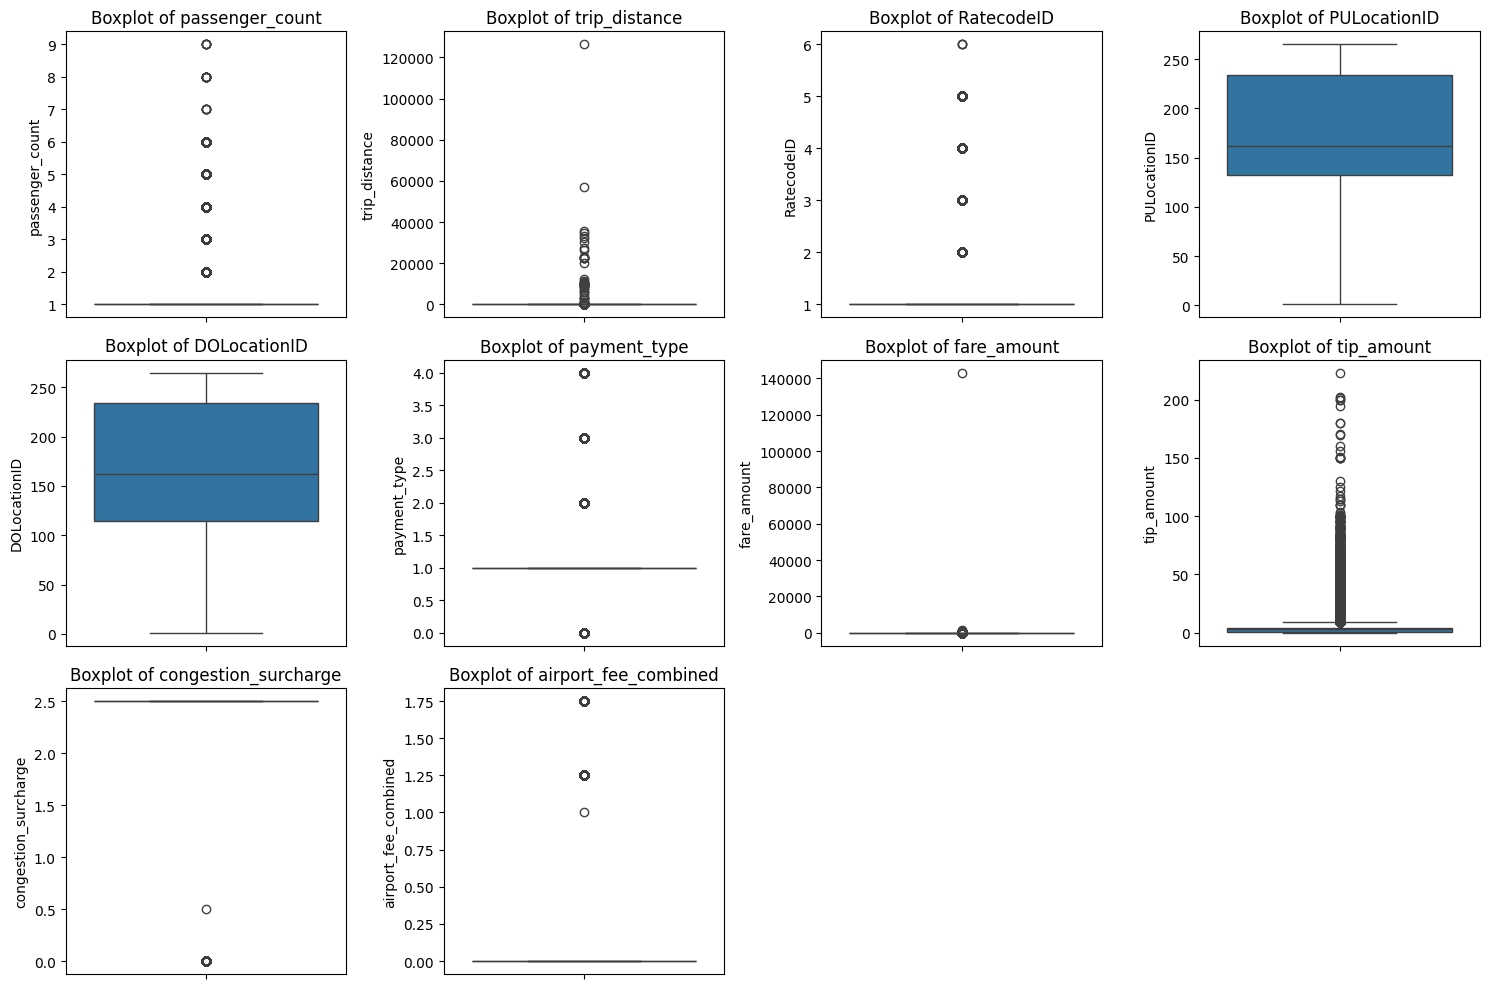

In [28]:
# Describe the data and check if there are any potential outliers present
print(df.describe())
# Check for potential out of place values in various columns
numerical_columns = ['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'airport_fee_combined']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # Adjusting rows and columns for better visualization
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [29]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print(f"Rows after removing large passenger counts: {df.shape[0]}")

Rows after removing large passenger counts: 1896379


In [30]:
# Continue with outlier handling
invalid_fare_distance_df = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
print(f"Number of records with trip_distance < 0.1 and fare_amount > 300: {len(invalid_fare_distance_df)}")
display(invalid_fare_distance_df.head())

Number of records with trip_distance < 0.1 and fare_amount > 300: 35


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
38085          1  2023-01-09 16:17:32   2023-01-09 16:20:41                1   
46484          1  2023-01-11 12:38:54   2023-01-11 12:38:54                1   
90267          2  2023-01-19 20:58:47   2023-01-19 20:58:51                4   
199729         2  2023-10-09 21:36:01   2023-10-09 21:39:15                1   
215415         1  2023-10-13 18:22:04   2023-10-13 18:22:38                1   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
38085             0.0           5           141           141             3   
46484             0.0           1           264           264             1   
90267             0.0           5           265           265             1   
199729            0.0           5           100           100             1   
215415            0.0           5           168           168             2   

        fare_amount  extra  tip_amount  improvement_surcharge  total_amount  \
38085         999.0    0.0        0.00                    1.0       1000.00   
46484         450.0    0.0        0.00                    0.0        450.00   
90267         380.0    0.0       95.25                    1.0        476.25   
199729        370.0    0.0        0.00                    1.0        373.50   
215415        640.0    0.0        0.00                    1.0        641.00   

        congestion_surcharge pickup_date  pickup_hour  airport_fee_combined  
38085                    0.0  2023-01-09           16                   0.0  
46484                    0.0  2023-01-11           12                   0.0  
90267                    0.0  2023-01-19           20                   0.0  
199729                   2.5  2023-10-09           21                   0.0  
215415                   0.0  2023-10-13           18                   0.0

In [31]:
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df.shape

(1896344, 18)

In [32]:
zero_trip_fare_diff_zones = df[
    (df['trip_distance'] == 0) & 
    (df['fare_amount'] == 0) & 
    (df['PULocationID'] != df['DOLocationID'])
]
print(f"Number of such invalid rows: {len(zero_trip_fare_diff_zones)}")
display(zero_trip_fare_diff_zones.head())

Number of such invalid rows: 63


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
43681          1  2023-01-10 19:28:41   2023-01-10 20:14:48                1   
83048          1  2023-01-18 15:42:00   2023-01-18 15:42:00                1   
83247          1  2023-01-18 16:23:49   2023-01-18 16:23:49                1   
90721          1  2023-01-19 21:57:21   2023-01-19 22:17:44                1   
142069         1  2023-01-29 18:33:14   2023-01-29 18:33:14                1   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
43681             0.0           1           127            91             1   
83048             0.0           1           161           264             2   
83247             0.0           1           239           264             2   
90721             0.0           1           170            75             0   
142069            0.0           5           261           264             2   

        fare_amount  extra  tip_amount  improvement_surcharge  total_amount  \
43681           0.0    0.0         0.0                    0.0           0.0   
83048           0.0    0.0         0.0                    0.0           0.0   
83247           0.0    0.0         0.0                    0.0           0.0   
90721           0.0    0.0         0.0                    0.0           2.0   
142069          0.0    0.0         0.0                    0.0           0.0   

        congestion_surcharge pickup_date  pickup_hour  airport_fee_combined  
43681                    0.0  2023-01-10           19                   0.0  
83048                    0.0  2023-01-18           15                   0.0  
83247                    0.0  2023-01-18           16                   0.0  
90721                    2.5  2023-01-19           21                   0.0  
142069                   0.0  2023-01-29           18                   0.0

In [33]:
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df.shape

(1896281, 18)

In [34]:
df = df[df['trip_distance'] <= 250]

In [35]:
df = df[df['payment_type'] != 0]

In [36]:
df.shape

(1831391, 18)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [37]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [38]:
df_categorical_cols =[ 'VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
                        'Pickup_Date', 'Pickup_Day', 'Pickup_Hour']
df_Numerical_cols =  [ 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                       'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

print(f" Categorical Columns : {df_categorical_cols}")
print(f" Numerical Columns : {df_Numerical_cols}")

 Categorical Columns : ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'Pickup_Date', 'Pickup_Day', 'Pickup_Hour']
 Numerical Columns : ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

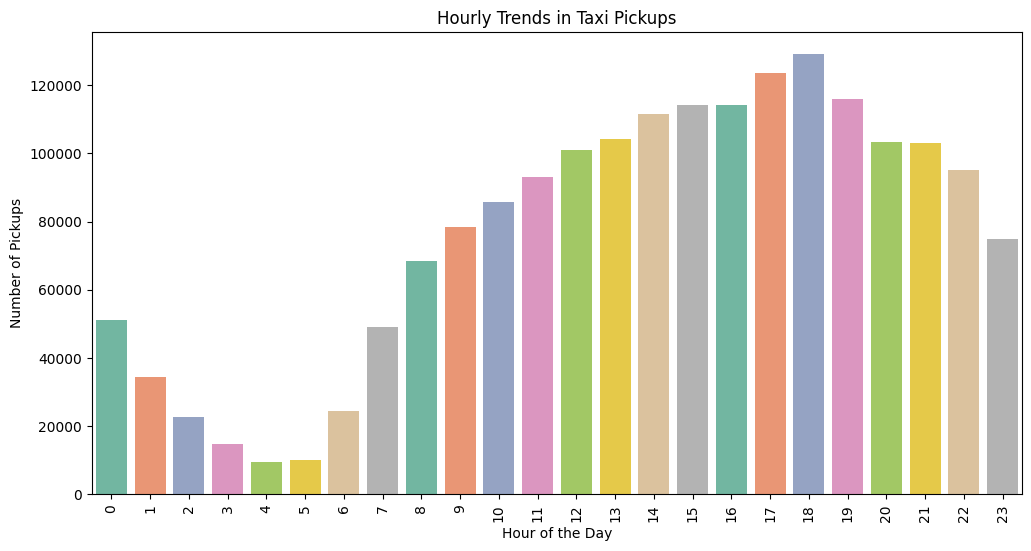

In [40]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_time_derived'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups = df['pickup_time_derived'].value_counts().sort_index()
custom_bar_plot(hourly_pickups.index, hourly_pickups.values, 'Hourly Trends in Taxi Pickups', 'Hour of the Day', 'Number of Pickups')

* We can observe that number of pickups is most between 5 tp 7 PM

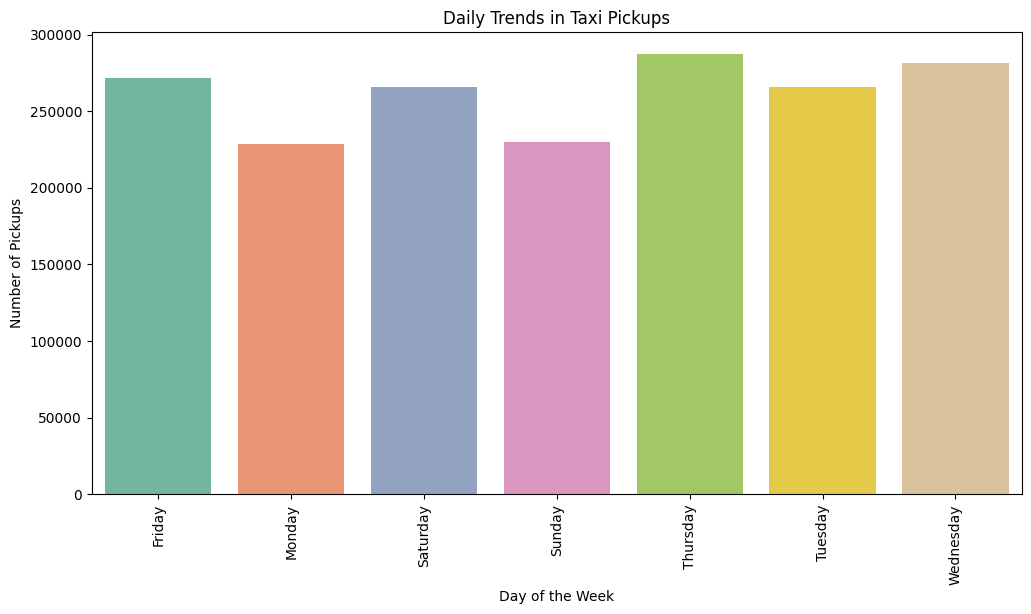

In [41]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

df['pickup_day_derived'] = df['tpep_pickup_datetime'].dt.dayofweek
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name'] = df['pickup_day_derived'].map(day_mapping)
daily_pickups = df['pickup_day_name'].value_counts().sort_index()
custom_bar_plot(daily_pickups.index, daily_pickups.values, 'Daily Trends in Taxi Pickups', 'Day of the Week', 'Number of Pickups')

* Thursday has the highest number of pickups (287,265), possibly indicating a high volume of work-related travel and social activities before the weekend.

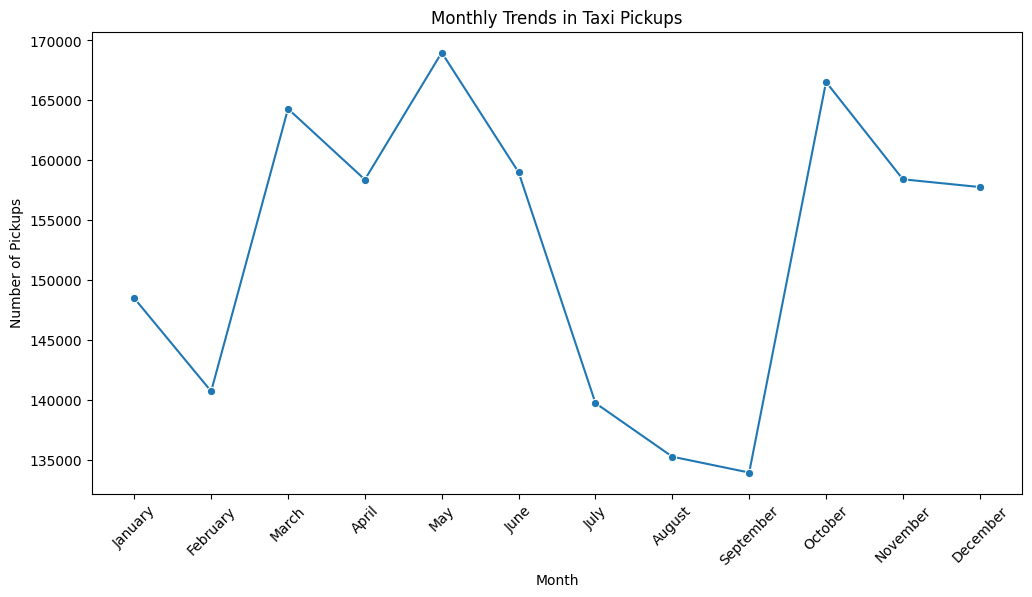

In [42]:
# Show the monthly trends in pickups
def custom_line_plot(x, y, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


df['pickup_month_derived'] = df['tpep_pickup_datetime'].dt.month

month_name_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['pickup_month_name_derived'] = df['pickup_month_derived'].map(month_name_map)

monthly_pickups = df['pickup_month_name_derived'].value_counts().reindex(month_name_map.values())

custom_line_plot(monthly_pickups.index.astype(str), monthly_pickups.values, 'Monthly Trends in Taxi Pickups', 'Month', 'Number of Pickups')

* October , November and December usually have high pickups due to holidays
* May sees spike as temperature get warmer

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [43]:
# Analyse the above parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df[financial_columns].describe()

fare_amount    tip_amount  total_amount  trip_distance
count  1.831391e+06  1.831391e+06  1.831391e+06   1.831391e+06
mean   1.981667e+01  3.573526e+00  2.894036e+01   3.444838e+00
std    1.073392e+02  4.069437e+00  1.082167e+02   4.545772e+00
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.050000e+00
50%    1.350000e+01  2.860000e+00  2.100000e+01   1.780000e+00
75%    2.190000e+01  4.450000e+00  3.070000e+01   3.370000e+00
max    1.431635e+05  2.230800e+02  1.431675e+05   2.048600e+02

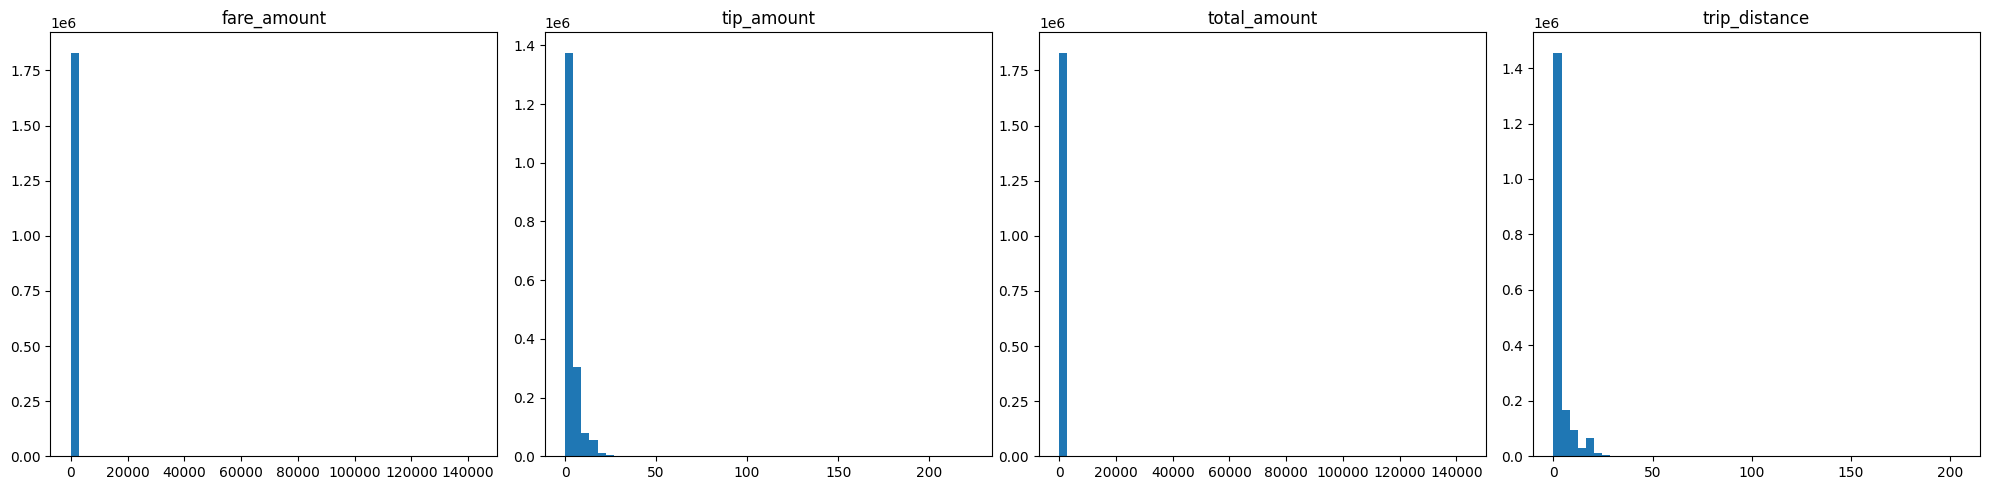

In [44]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

for axs, col in zip(axs.flatten(), financial_columns):
    axs.hist(df[col], bins=50)
    axs.set_title(col)

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [45]:
# Create a df with non zero entries for the selected parameters.
non_zero_df = df[(df['fare_amount'] != 0) & (df['tip_amount'] != 0) & (df['total_amount'] != 0) & (df['trip_distance'] != 0)]
non_zero_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31                2   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1           1.24           1           161           237             1   
5           7.10           1           246            37             1   
6           1.59           1            79           164             1   
7           3.16           1            79           256             1   
8           7.64           1           132            95             1   

   fare_amount  ...  total_amount  congestion_surcharge  pickup_date  \
1          7.9  ...         15.48                   2.5   2023-01-01   
5         34.5  ...         47.40                   2.5   2023-01-01   
6         11.4  ...         19.68                   2.5   2023-01-01   
7         19.1  ...         30.12                   2.5   2023-01-01   
8         31.7  ...         42.54                   0.0   2023-01-01   

   pickup_hour  airport_fee_combined pickup_time_derived  pickup_day_derived  \
1            0                  0.00                   0                   6   
5            0                  0.00                   0                   6   
6            0                  0.00                   0                   6   
7            0                  0.00                   0                   6   
8            0                  1.25                   0                   6   

   pickup_day_name  pickup_month_derived  pickup_month_name_derived  
1           Sunday                     1                    January  
5           Sunday                     1                    January  
6           Sunday                     1                    January  
7           Sunday                     1                    January  
8           Sunday                     1                    January  

[5 rows x 23 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

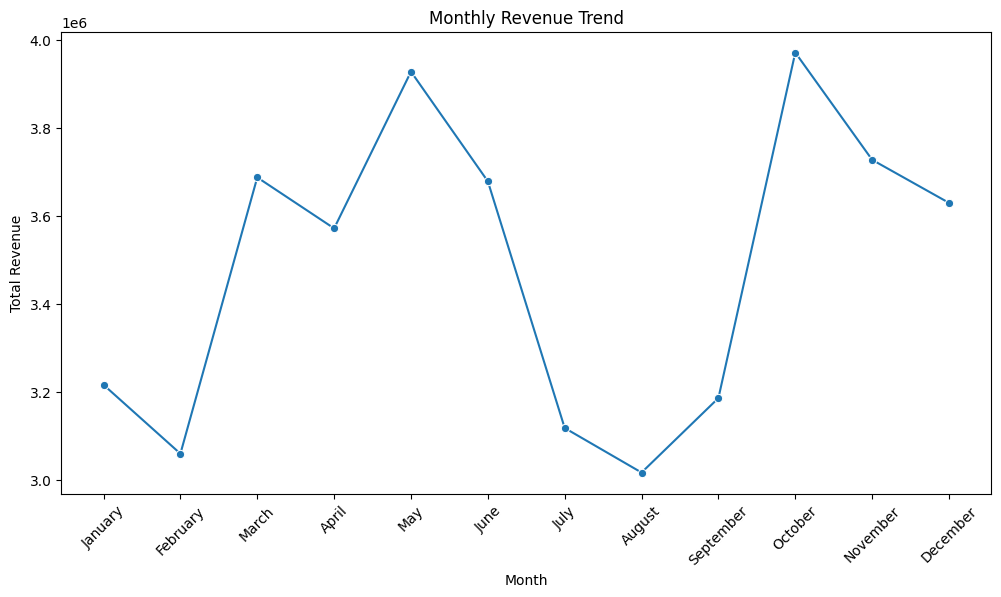

In [46]:
# Group data by month and analyse monthly revenue
monthly_revenue = non_zero_df.groupby('pickup_month_name_derived')['total_amount'].sum().reindex(month_name_map.values())
custom_line_plot(monthly_revenue.index, monthly_revenue.values, 'Monthly Revenue Trend', 'Month', 'Total Revenue')

* March, April, May and then October, November and December seem to be doing well showing seasonal trends

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

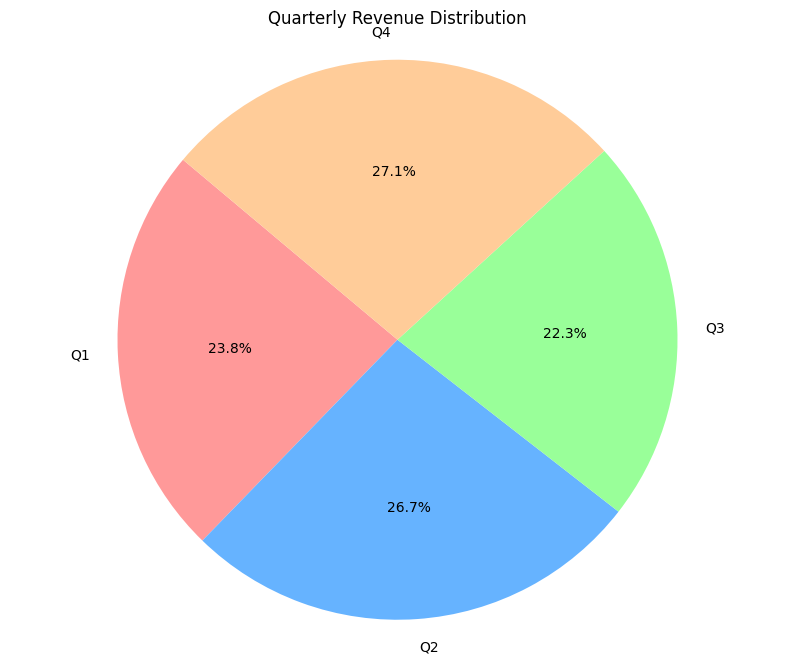

In [47]:
# Calculate proportion of each quarter
def month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

non_zero_df['pickup_quarter_derived'] = non_zero_df['pickup_month_derived'].apply(month_to_quarter)

quarterly_revenue = non_zero_df.groupby('pickup_quarter_derived')['total_amount'].sum()

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']  
plt.figure(figsize=(10, 8))
plt.pie(quarterly_revenue, labels=quarterly_revenue.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Quarterly Revenue Distribution')
plt.axis('equal') 
plt.show()

* Q4 is leading followed by Q2 relating to seasonal trends shown in the above graph as well

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

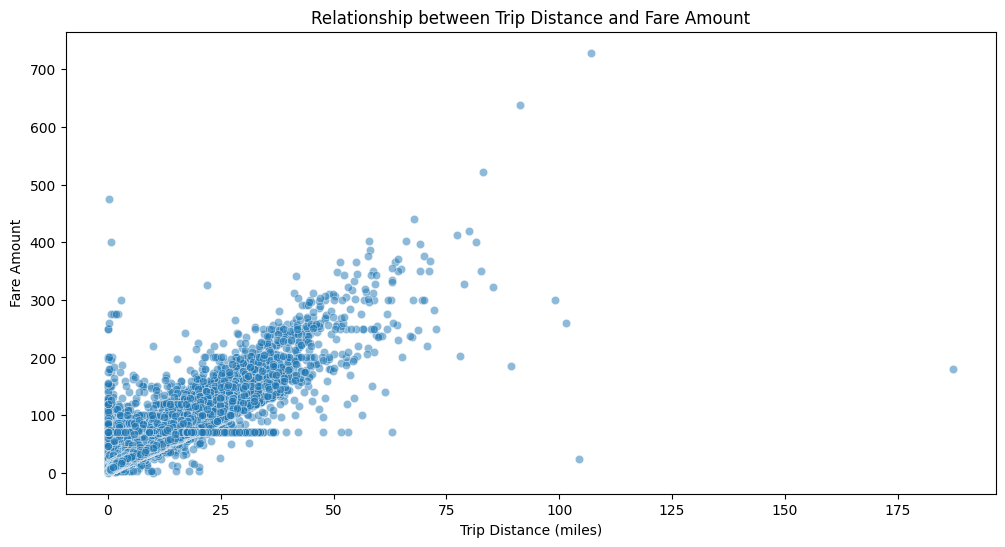

Correlation between Trip Distance and Fare Amount: 0.95


In [48]:
# Show how trip fare is affected by distance
def custom_scatter_plot(x, y, data, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, data=data, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

filtered_df = non_zero_df[non_zero_df['trip_distance'] > 0]

custom_scatter_plot('trip_distance', 'fare_amount', filtered_df, 'Relationship between Trip Distance and Fare Amount', 'Trip Distance (miles)', 'Fare Amount')

correlation_value = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}')

* There seems to be a positive correlation between trip distance and fare amount. As the trip distance increases, the fare amount generally
 increases as well.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

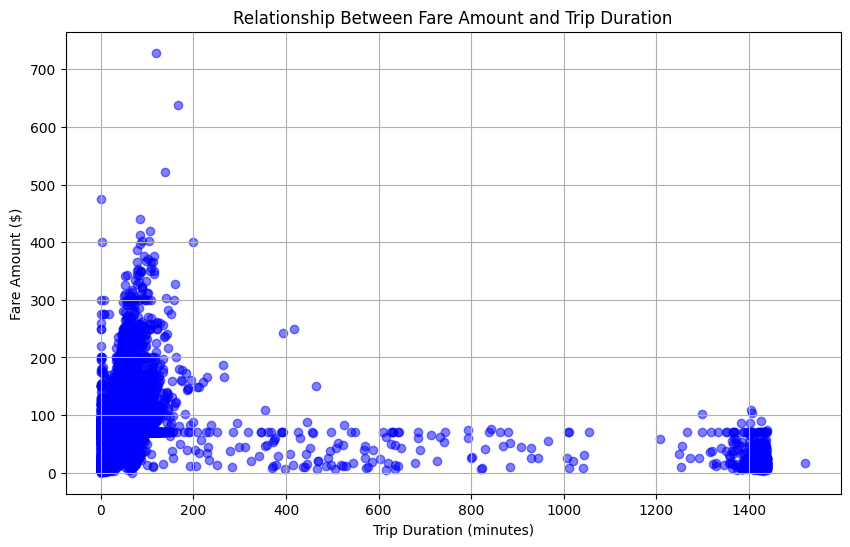

Correlation between trip duration and fare amount: 0.33


In [49]:
# Show relationship between fare and trip duration
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])
non_zero_df['tpep_dropoff_datetime'] = pd.to_datetime(non_zero_df['tpep_dropoff_datetime'])

non_zero_df['trip_duration'] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60

filtered_data = non_zero_df[(non_zero_df['fare_amount'] > 0) & (non_zero_df['trip_duration'] > 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['trip_duration'], filtered_data['fare_amount'], alpha=0.5, color='b')
plt.title('Relationship Between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = filtered_data['trip_duration'].corr(filtered_data['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")

* There seems to be a positive correlation between trip duration and fare amount. As the trip duration increases, the fare amount also tends to increase. This is expected since longer trips typically cost more.

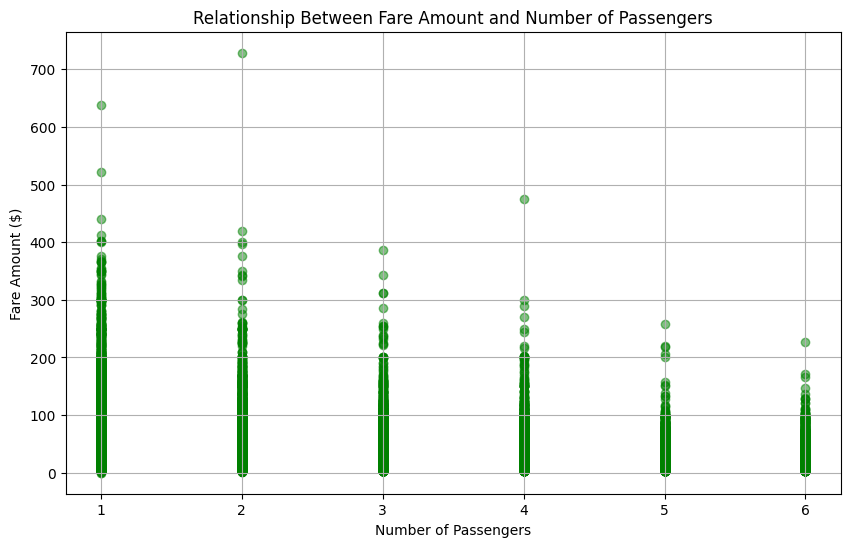

Correlation between Fare Amount and Number of Passengers: 0.04


In [50]:
# Show relationship between fare and number of passengers
filtered_data = non_zero_df[(non_zero_df['fare_amount'] > 0) & (non_zero_df['passenger_count'] > 0)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['passenger_count'], filtered_data['fare_amount'], alpha=0.5, color='g')
plt.title('Relationship Between Fare Amount and Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = filtered_data['passenger_count'].corr(filtered_data['fare_amount'])
print(f"Correlation between Fare Amount and Number of Passengers: {correlation:.2f}")

* The correlation between the number of passengers and the fare amount is weak.

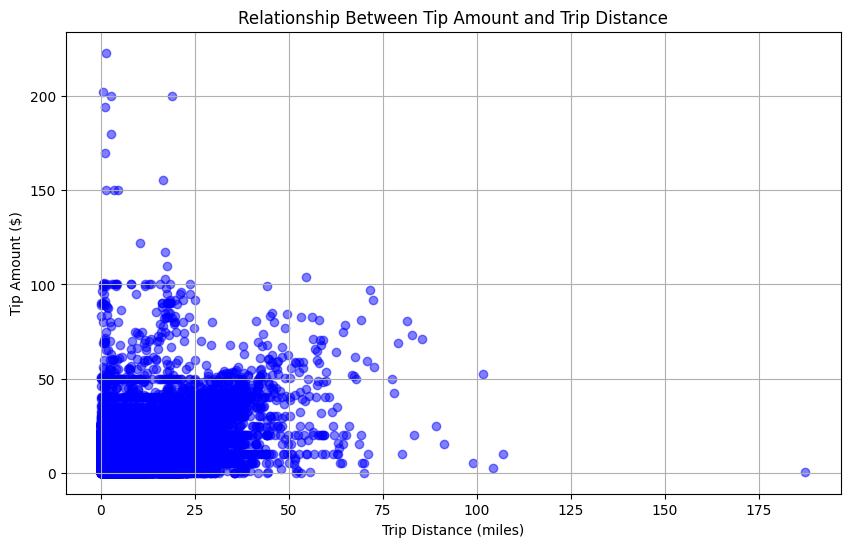

Correlation between Trip Distance and Tip Amount: 0.80


In [51]:
# Show relationship between tip and trip distance
filtered_data = non_zero_df[(non_zero_df['tip_amount'] > 0) & (non_zero_df['trip_distance'] > 0)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['trip_distance'], filtered_data['tip_amount'], alpha=0.5, color='b')
plt.title('Relationship Between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

correlation_value_tip_distance = non_zero_df['trip_distance'].corr(non_zero_df['tip_amount'])
print(f'Correlation between Trip Distance and Tip Amount: {correlation_value_tip_distance:.2f}')


* There seems to be a positive correlation between trip distance and tip amount. As the trip distance increases, the tip amount also tends to increase.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

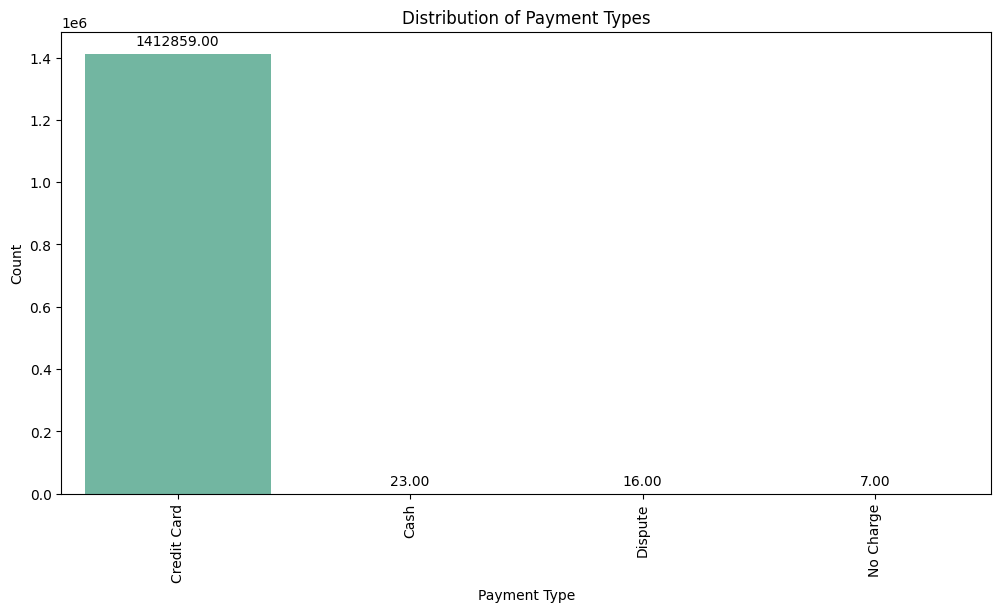

In [53]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = non_zero_df['payment_type'].value_counts()
payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

payment_type_counts.index = payment_type_counts.index.map(payment_type_map)
custom_bar_plot(payment_type_counts.index, payment_type_counts.values, 'Distribution of Payment Types', 'Payment Type', 'Count', show_data_labels=True)

* Majority of the payments are made by Credit card, then followed by cash.

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [80]:
!pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.2 MB 4.6 MB/s eta 0:00:04
   ---- ----------------------------------- 2.1/19.2 MB 4.2 MB/s eta 0:00:05
   ---- ----------------------------------- 2.4/19.2 MB 4.3 MB/s eta 0:00:04
   ------ --------------------------------- 2.9/19.2 MB 3.4 MB/s eta 0:00:05
   ------ --------------------------------- 3.1/19.2 MB 3.2 MB/s eta 0:00:06
   -------- ------------------------------- 4.2/19.2 MB 3.1 MB/s eta 0:00:05
   --------- ------------------------------ 4.5/19.2 MB 3.1 MB/s eta 0:00:05
   --------- ------------------------------ 4.7/19.2 MB 2.8 MB/s eta 0:00:06
   ---------- ----------------------------- 5.0/19.2 MB 2.6 MB/s eta 0:00:06
   ---------- ----------------------------- 5.2/19.2 MB 2.5 MB/s eta 0:00:06
   ------------ --------------------------- 6.0/19.2 MB 2.5 MB/s eta 0:00:06
   ----------

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [115]:
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\jiniy\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

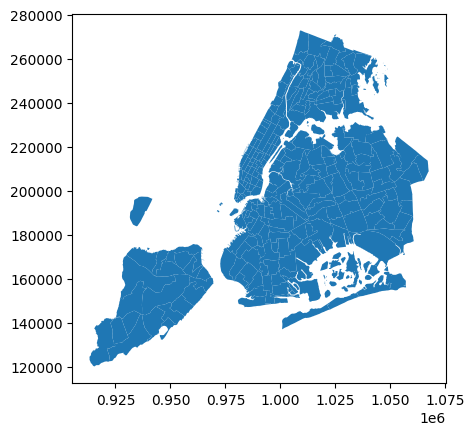

In [116]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [117]:
# Merge trip counts back to the zones GeoDataFrame
merged_df = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412935 entries, 0 to 1412934
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   VendorID                   1412935 non-null  int64         
 1   tpep_pickup_datetime       1412935 non-null  datetime64[ns]
 2   tpep_dropoff_datetime      1412935 non-null  datetime64[ns]
 3   passenger_count            1412935 non-null  int32         
 4   trip_distance              1412935 non-null  float64       
 5   RatecodeID                 1412935 non-null  int32         
 6   PULocationID               1412935 non-null  int64         
 7   DOLocationID               1412935 non-null  int64         
 8   payment_type               1412935 non-null  int64         
 9   fare_amount                1412935 non-null  float64       
 10  extra                      1412935 non-null  float64       
 11  tip_amount                 1412935 no

In [120]:
# Group data by location and calculate the number of trips
trips_per_location = merged_df.groupby('PULocationID').size().reset_index(name='total_trips')
trips_per_location.sort_values(by='total_trips',ascending=False).head()

PULocationID  total_trips
199           237        69858
134           161        67730
198           236        63695
109           132        63639
135           162        52690

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [129]:
# Merge trip counts back to the zones GeoDataFrame
Zone_Pickup_Count = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left') 
print(f"Count of records with 0 Pick up : {Zone_Pickup_Count.total_trips.isnull().sum()} out of {Zone_Pickup_Count.shape[0]}")

Zone_Pickup_Count.total_trips.fillna(0,inplace=True)
print(f"Count of records after Imputing Pick up : {Zone_Pickup_Count.total_trips.isnull().sum()} out of {Zone_Pickup_Count.shape[0]}")
Zone_Pickup_Count.head(2)

Count of records with 0 Pick up : 39 out of 263
Count of records after Imputing Pick up : 0 out of 263


OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   
1         2    0.433470    0.004866     Jamaica Bay           2  Queens   

                                            geometry  PULocationID  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...           1.0   
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...           2.0   

   total_trips  
0         35.0  
1          2.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
PULocationID	

In [130]:
# Define figure and axis
zone_trip_counts = merged_df['PULocationID'].value_counts().reset_index()
zone_trip_counts.columns = ['LocationID', 'trip_count']

# Merge the trip counts with the GeoDataFrame
zones = zones.merge(zone_trip_counts, on='LocationID', how='left')

# Fill NaN values with 0 (if there are zones with no trips)
zones['trip_count'] = zones['trip_count'].fillna(0)

# Define the figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the GeoDataFrame with the trip counts
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"}, cmap='OrRd')

# Display the plot
plt.title('Zone-wise Number of Trips')
plt.show()

In [133]:
# can you try displaying the zones DF sorted by the number of trips?
Sorted_zone=Zone_Pickup_Count.sort_values(by='total_trips', ascending=False)
Sorted_zone[['borough','zone','total_trips']].head(20)

borough                          zone  total_trips
236  Manhattan         Upper East Side South      69858.0
160  Manhattan                Midtown Center      67730.0
235  Manhattan         Upper East Side North      63695.0
131     Queens                   JFK Airport      63639.0
161  Manhattan                  Midtown East      52690.0
137     Queens             LaGuardia Airport      51617.0
141  Manhattan           Lincoln Square East      48921.0
185  Manhattan  Penn Station/Madison Sq West      48583.0
229  Manhattan     Times Sq/Theatre District      44372.0
169  Manhattan                   Murray Hill      43163.0
162  Manhattan                 Midtown North      41856.0
238  Manhattan         Upper West Side South      41108.0
233  Manhattan                      Union Sq      40415.0
67   Manhattan                  East Chelsea      37332.0
47   Manhattan                  Clinton East      36428.0
140  Manhattan               Lenox Hill West      34834.0
78   Manhattan                  East Village      34821.0
248  Manhattan                  West Village      33898.0
163  Manhattan                 Midtown South      33291.0
106  Manhattan                      Gramercy      30977.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


- The busiest hours are between 5 and 7 PM, likely due to people leaving work during this time, which may explain the high taxi demand
- Traffic is generally higher on weekdays, with noticeable spikes on Thursday and Friday.
- Monthly trend is seasonal, People tend to travel shop on holidays (during October to December). Then from March to May summers are starting


- Revenue trend- March, April, May and then October, November and December seem to be doing well showing seasonal trends
- In terms of revenue collection, Q4 is the leader for 2023 followed by Q2

- A positive correlation between trip distance and fare amount. As the trip distance increases, the fare amount generally increases as well.
- A positive correlation between trip duration and fare amount. As the trip duration increases, the fare amount also tends to increase. This is expected since longer trips typically cost more.
- Single passengers tend to travel longer distances compared to groups, as the fare amount is higher for single passengers. This indicates a positive correlation between trip distance and fare amount.
- There seems a positive correlation between trip distance and tip amount.

- Upper east south side, Midtown center,Upper east side north,JFK airport, Midtown east are the top 5 busiest zones

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [139]:
grouped = merged_df.groupby(['PULocationID', 'DOLocationID', 'pickup_time_derived'])

route_stats = grouped.agg({
    'trip_duration': 'mean',
    'trip_distance': 'mean'
}).reset_index()

route_stats['speed'] = route_stats['trip_distance'] / (route_stats['trip_duration'] / 60)

slow_routes = route_stats[route_stats['speed'] < 10]

slow_routes.head()

PULocationID  DOLocationID  pickup_time_derived  trip_duration  \
4              1             1                   11       1.033333   
23             4             4                    0       1.927778   
24             4             4                    1       4.850000   
25             4             4                    2       2.700000   
26             4             4                    3       2.141667   

    trip_distance     speed  
4        0.030000  1.741935  
23       0.273333  8.507205  
24       0.520000  6.432990  
25       0.390000  8.666667  
26       0.355000  9.945525

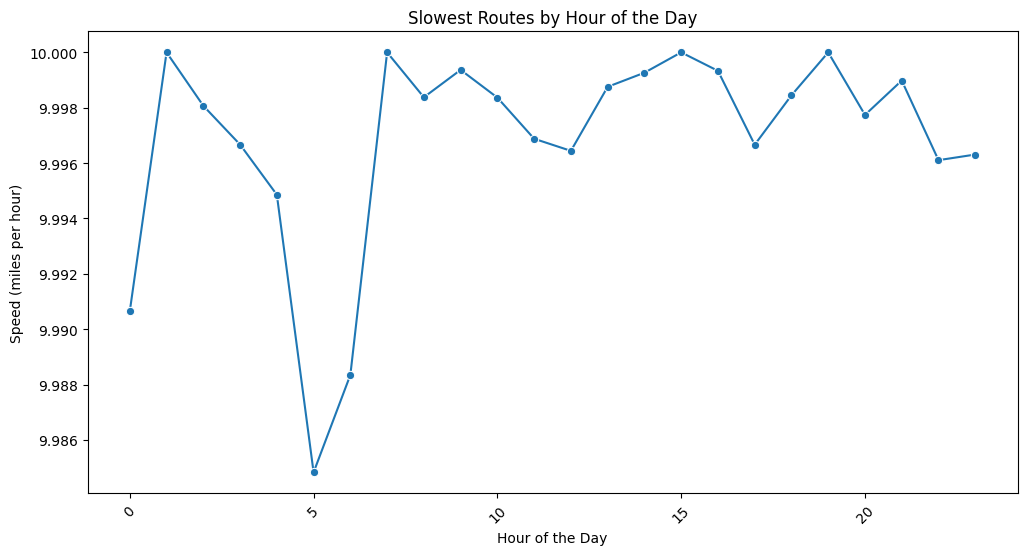

In [141]:
slow_routes_by_hour = slow_routes.groupby('pickup_time_derived').apply(lambda x: x.nlargest(1, 'speed')).reset_index(drop=True)
custom_line_plot(slow_routes_by_hour.pickup_time_derived, slow_routes_by_hour.speed, 'Slowest Routes by Hour of the Day', 'Hour of the Day', 'Speed (miles per hour)')

-  The speed remains relatively constant, fluctuating between approximately 9.988 and 10.000 miles per hour.
-  The slowest routes do not vary significantly in speed throughout the day, indicating consistent traffic conditions on these routes

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

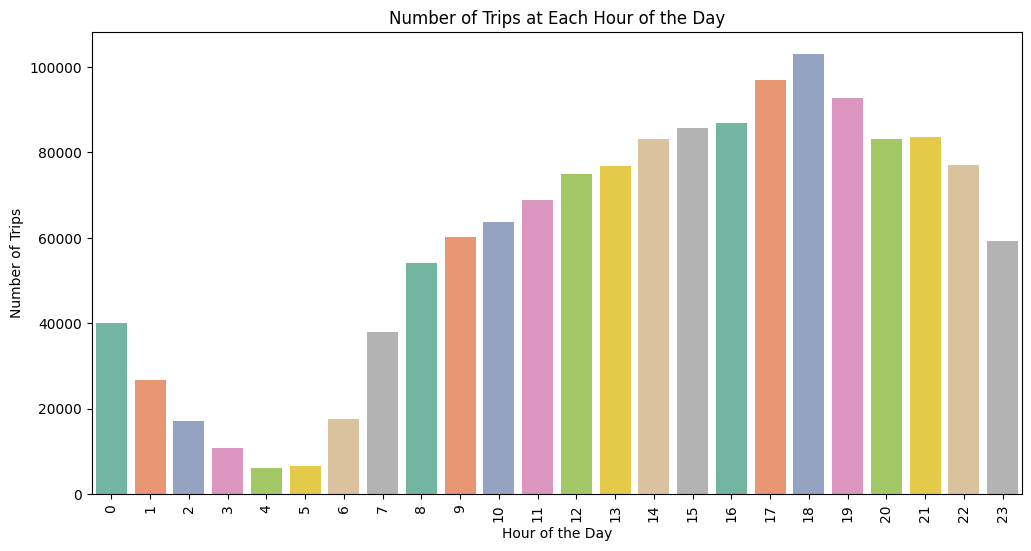

The busiest hour is 18:00 with 103059 trips.


In [143]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trip_counts = merged_df['pickup_time_derived'].value_counts().sort_index()

custom_bar_plot(hourly_trip_counts.index, hourly_trip_counts.values, 'Number of Trips at Each Hour of the Day', 'Hour of the Day', 'Number of Trips')
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_trips = hourly_trip_counts.max()
print(f'The busiest hour is {busiest_hour}:00 with {busiest_hour_trips} trips.')

- Peak hours with higher trip volumes are between morning and evening rush hours.

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [144]:
busiest_hours = hourly_trip_counts.nlargest(5)
print("Actual number of trips in the five busiest hours:")
busiest_hours

Actual number of trips in the five busiest hours:


pickup_time_derived
18    103059
17     96953
19     92730
16     86841
15     85666
Name: count, dtype: int64

In [148]:
# Scale up the number of trips
sample_fraction =10
scaled_trips_per_location = trips_per_location.copy()
scaled_trips_per_location['total_trips'] *= sample_fraction
scaled_trips_per_location.head()

PULocationID  total_trips
0             1          350
1             2           20
2             4        14030
3             6           10
4             7         2530

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

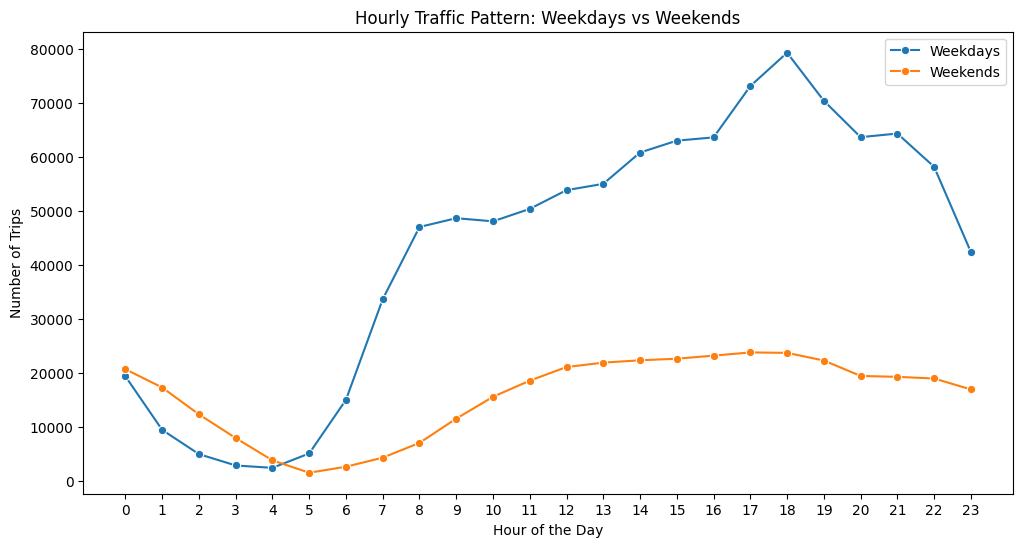

In [149]:
# Compare traffic trends for the week days and weekends
weekdays_df = merged_df[merged_df['pickup_day_derived'] < 5]  # Monday to Friday
weekends_df = merged_df[merged_df['pickup_day_derived'] >= 5]  # Saturday and Sunday

weekday_hourly_pickups = weekdays_df['pickup_time_derived'].value_counts().sort_index()

weekend_hourly_pickups = weekends_df['pickup_time_derived'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=weekday_hourly_pickups.index, y=weekday_hourly_pickups.values, marker='o', label='Weekdays')
sns.lineplot(x=weekend_hourly_pickups.index, y=weekend_hourly_pickups.values, marker='o', label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xticks(range(24))
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

- During weekdays traffic starts to increase steadily and then peaks around 5-7 PM due to people returning from work.
- On weekends, traffic builds up more slowly, typically rising around 10 AM as people head out for brunch, lunch, or shopping, with another noticeable increase at night due to nightlife activities.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

 Top 10 Pickup Zones:
pickup_zone
Upper East Side South           69859
Midtown Center                  67733
Upper East Side North           63695
JFK Airport                     63688
Midtown East                    52692
LaGuardia Airport               51650
Lincoln Square East             48921
Penn Station/Madison Sq West    48587
Times Sq/Theatre District       44372
Murray Hill                     43164
Name: count, dtype: int64
 Top 10 Dropoff Zones:
dropoff_zone
Upper East Side North        67479
Upper East Side South        62508
Midtown Center               55371
Murray Hill                  43204
Upper West Side South        42713
Lincoln Square East          41487
Midtown East                 41354
Lenox Hill West              39774
Times Sq/Theatre District    39311
East Chelsea                 36098
Name: count, dtype: int64


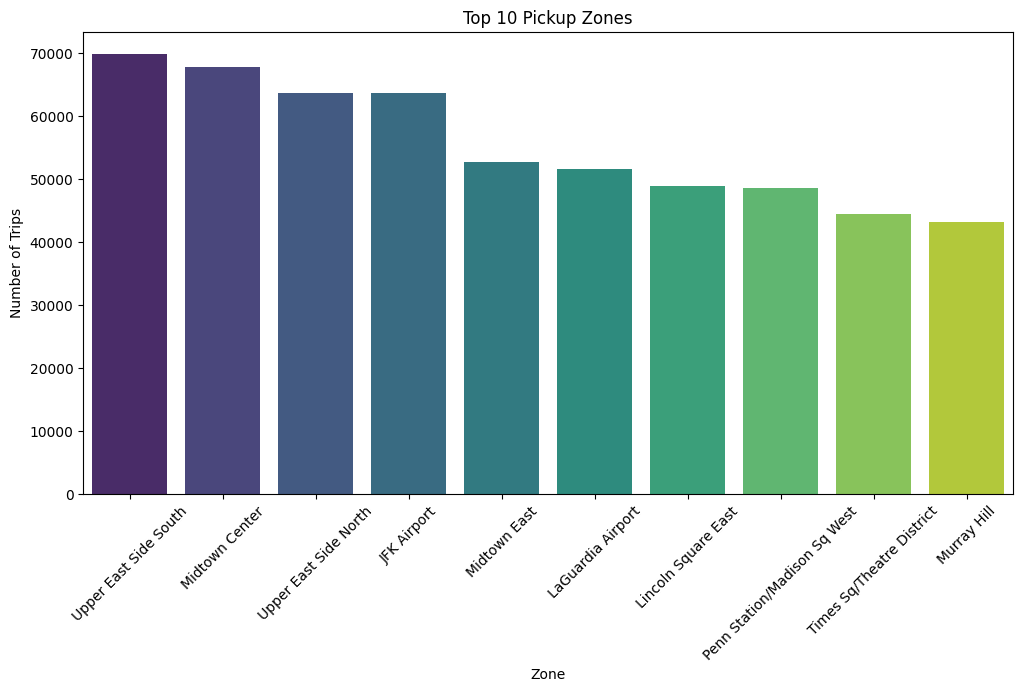

In [150]:
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
zones_dropoff = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

# Merge pickup zone
df_zones = non_zero_df.merge(zones_pickup[['PULocationID', 'pickup_zone']], on='PULocationID', how='left')

# Merge dropoff zone
df_zones = df_zones.merge(zones_dropoff[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')

top_pickup_zones = df_zones['pickup_zone'].value_counts().head(10)
print(" Top 10 Pickup Zones:")
print(top_pickup_zones)
top_dropoff_zones = df_zones['dropoff_zone'].value_counts().head(10)
print(" Top 10 Dropoff Zones:")
print(top_dropoff_zones)

#plot pickup zone
plt.figure (figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Pickup Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
#plot dropoff zones
plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

- Top 10 Pickup and Drop, we can clearly see Upper east side south and north being hotspot. 

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [152]:
pickup_counts = df_zones['pickup_zone'].value_counts().rename("pickup_count")

# Count drop-offs
dropoff_counts = df_zones['dropoff_zone'].value_counts().rename("dropoff_count")

# Combine into one DataFrame
zone_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
# Avoid division by zero
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count'].replace(0, 1)
# Top 10 zones with highest pickup-to-dropoff ratio
top_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 zones with lowest pickup-to-dropoff ratio
bottom_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio').head(10)
print(" Top 10 Zones (More Pickups than Drop-offs):")
print(top_10_ratio[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print(" Bottom 10 Zones (More Drop-offs than Pickups):")
print(bottom_10_ratio[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


 Top 10 Zones (More Pickups than Drop-offs):
                                  pickup_count  dropoff_count  \
East Elmhurst                           6404.0          462.0   
JFK Airport                            63688.0        13430.0   
LaGuardia Airport                      51650.0        17977.0   
Jamaica Bay                                2.0            0.0   
Rikers Island                              2.0            0.0   
Saint Michaels Cemetery/Woodside          12.0            7.0   
Penn Station/Madison Sq West           48587.0        29442.0   
Central Park                           23917.0        17235.0   
Greenwich Village South                19827.0        14340.0   
West Village                           33899.0        25470.0   

                                  pickup_dropoff_ratio  
East Elmhurst                                13.861472  
JFK Airport                                   4.742219  
LaGuardia Airport                             2.873116  
Jamaica Bay

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [157]:
night_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 23) | (merged_df['pickup_time_derived'] <= 5)]
night_pickup_counts = night_hours_df['PULocationID'].value_counts().reset_index()
night_pickup_counts.columns = ['LocationID', 'pickup_count']

night_dropoff_counts = night_hours_df['DOLocationID'].value_counts().reset_index()
night_dropoff_counts.columns = ['LocationID', 'dropoff_count']
top_night_pickup_zones = night_pickup_counts.nlargest(10, 'pickup_count')
top_night_dropoff_zones = night_dropoff_counts.nlargest(10, 'dropoff_count')
zone_lookup = merged_df[['LocationID', 'zone']].drop_duplicates()
top_night_pickup_zones = top_night_pickup_zones.merge(zone_lookup, on='LocationID', how='left')
top_night_dropoff_zones = top_night_dropoff_zones.merge(zone_lookup, on='LocationID', how='left')
print("Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):")
print(top_night_pickup_zones[['LocationID', 'zone', 'pickup_count']])

print("\nTop 10 Dropoff Zones during Night Hours (11 PM to 5 AM):")
print(top_night_dropoff_zones[['LocationID', 'zone', 'dropoff_count']])


Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):
   LocationID                          zone  pickup_count
0          79                  East Village         12843
1         249                  West Village         10494
2         132                   JFK Airport          9509
3          48                  Clinton East          8060
4         148               Lower East Side          8005
5         114       Greenwich Village South          7285
6         230     Times Sq/Theatre District          5881
7         186  Penn Station/Madison Sq West          5354
8         164                 Midtown South          4786
9         138             LaGuardia Airport          4689

Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM):
   LocationID                   zone  dropoff_count
0          79           East Village           6754
1          48           Clinton East           5106
2         170            Murray Hill           5046
3         107               Gramercy    

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

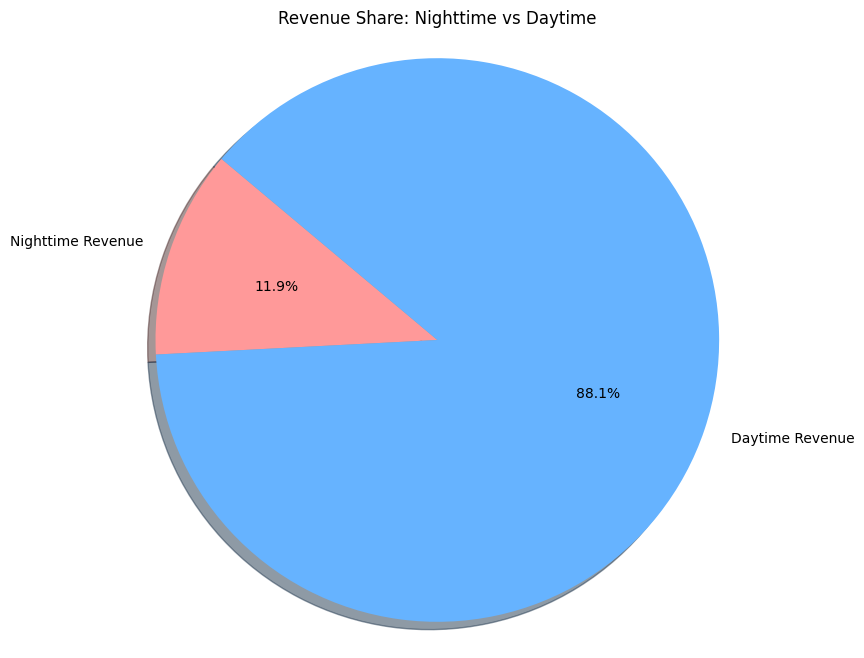

In [159]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 23) | (merged_df['pickup_time_derived'] <= 5)]

night_revenue = night_hours_df['total_amount'].sum()

day_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 6) & (merged_df['pickup_time_derived'] <= 22)]

day_revenue = day_hours_df['total_amount'].sum()


total_revenue = merged_df['total_amount'].sum()

night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

labels = ['Nighttime Revenue', 'Daytime Revenue']
sizes = [night_revenue_share, day_revenue_share]
explode = (0, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Revenue Share: Nighttime vs Daytime')
plt.axis('equal')
plt.show()

* Revenue yields were 88% during Day and 12% during night

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [160]:
# Analyse the fare per mile per passenger for different passenger counts
merged_df['fare_per_mile_derived'] = merged_df['fare_amount'] / merged_df['trip_distance']
avg_fare_per_mile = merged_df.groupby('passenger_count')['fare_per_mile_derived'].mean().reset_index()
avg_fare_per_mile['fare_per_mile_per_passenger'] = avg_fare_per_mile['fare_per_mile_derived'] / avg_fare_per_mile['passenger_count']
avg_fare_per_mile

passenger_count  fare_per_mile_derived  fare_per_mile_per_passenger
0                1               9.265572                     9.265572
1                2              10.005446                     5.002723
2                3               9.985896                     3.328632
3                4              15.731920                     3.932980
4                5               7.945660                     1.589132
5                6               7.708165                     1.284694

* Lower the count of passenger higher the fares are, from above date points we can conclude solo passengers pay the most fare.

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [161]:
def custom_bar_plot(x, y, title, xlabel, ylabel, figsize=(12, 6), show_data_labels=False):
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)

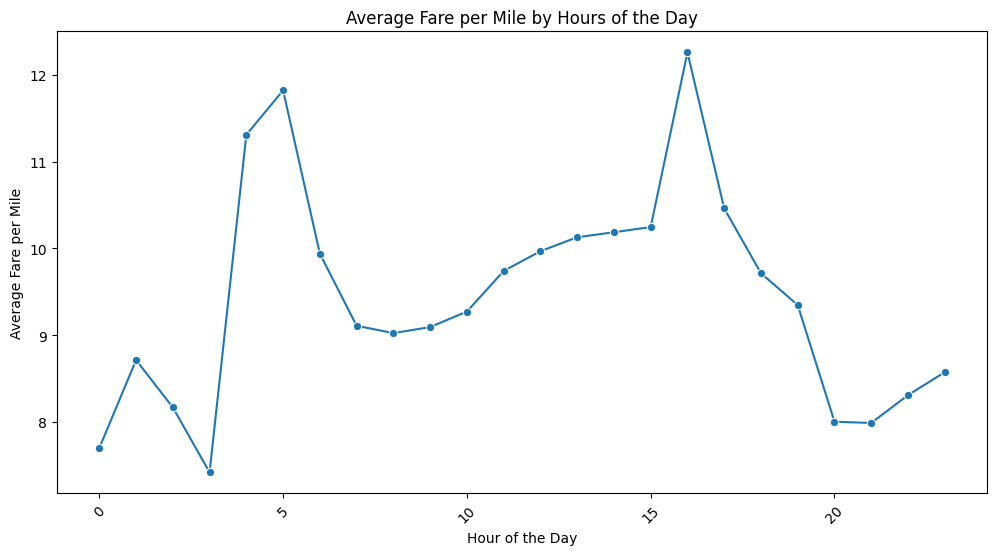

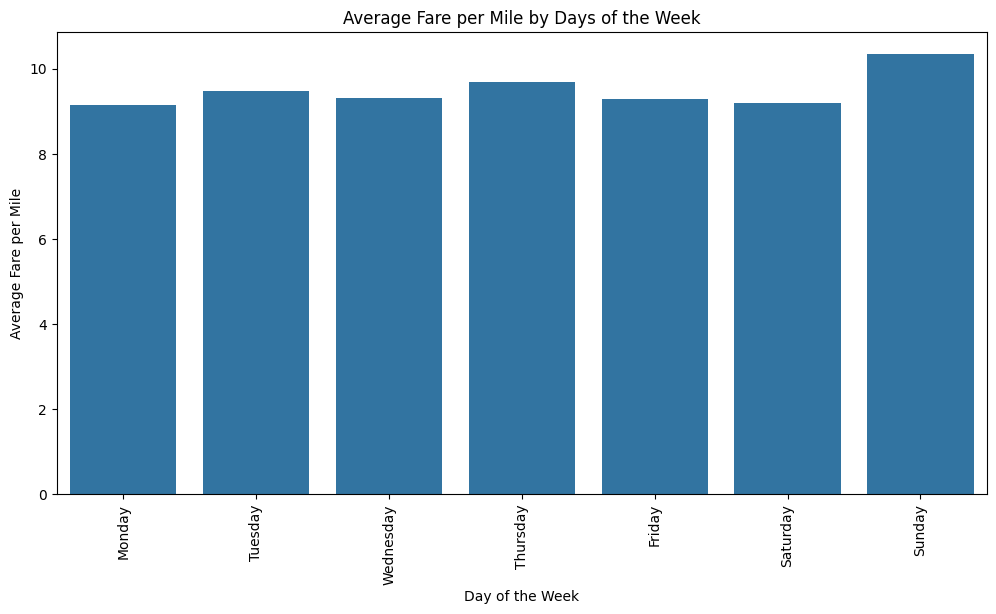

In [162]:
# Group by hour of the day and calculate the average fare per mile
avg_fare_per_mile_by_hour = merged_df.groupby('pickup_time_derived')['fare_per_mile_derived'].mean().reset_index()

avg_fare_per_mile_by_day = merged_df.groupby('pickup_day_derived')['fare_per_mile_derived'].mean().reset_index()

day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_fare_per_mile_by_day['pickup_day_name'] = avg_fare_per_mile_by_day['pickup_day_derived'].map(day_name_map)

custom_line_plot(avg_fare_per_mile_by_hour['pickup_time_derived'], avg_fare_per_mile_by_hour['fare_per_mile_derived'], 'Average Fare per Mile by Hours of the Day', 'Hour of the Day', 'Average Fare per Mile')
custom_bar_plot(avg_fare_per_mile_by_day['pickup_day_name'], avg_fare_per_mile_by_day['fare_per_mile_derived'], 'Average Fare per Mile by Days of the Week', 'Day of the Week', 'Average Fare per Mile')

- From Bar graph we can observe average is almost same for days, however there is slight increase on Sundays.
- From Line chart we can observe surge in fare during peak hours.

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [164]:
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Calculate average fare for diffrent VendorID
fare_by_vendor = non_zero_df.groupby('VendorID')['fare_per_mile'].mean().round(2)

# vendor names
vendor_names = {1: 'Creative Mobile Technologies,', 2: ' VeriFone Inc'}
fare_by_vendor.index = fare_by_vendor.index.map(vendor_names)

print("Average Fare per Mile by Vendor:")
print(fare_by_vendor)
fare_by_vendor.plot(kind='bar', color='orange', figsize=(6, 4))

plt.title("Average Fare per Mile by Vendor")
plt.xlabel("Vendor")
plt.ylabel("Fare per Mile ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Average Fare per Mile by Vendor:
VendorID
Creative Mobile Technologies,     7.93
 VeriFone Inc                    10.02
Name: fare_per_mile, dtype: float64


- Verifone has the highest Avg fare per mile


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Tiered Average Fare per Mile by Vendor:
distance_tier  0–2 miles  2–5 miles  >5 miles
VendorID                                     
CMT                 9.52       6.36      4.47
VeriFone           13.60       6.55      4.51


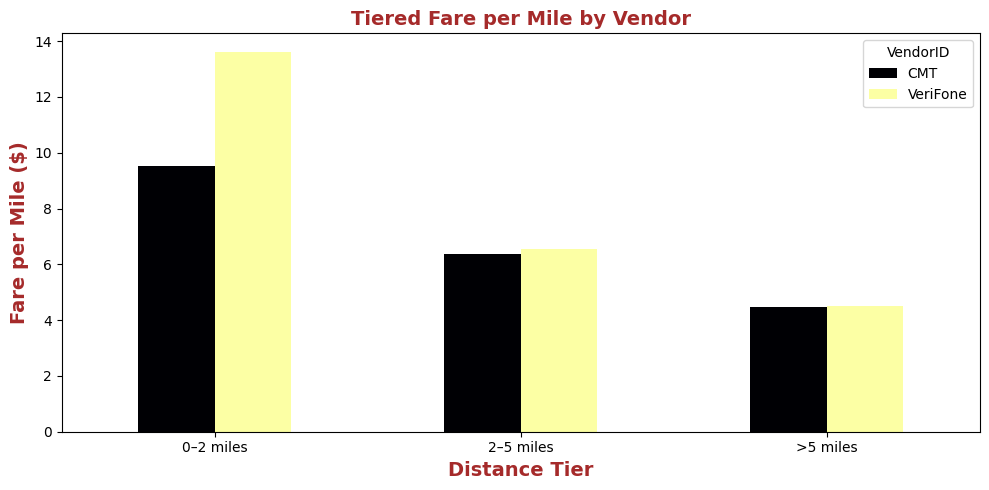

In [169]:
# Defining distance tiers
df_tiered = non_zero_df[(non_zero_df['fare_amount'] > 0) & (non_zero_df['trip_distance'] > 0)].copy()

df_tiered['distance_tier'] = pd.cut(
    df_tiered['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['0–2 miles', '2–5 miles', '>5 miles']
)
df_tiered['fare_per_mile'] = df_tiered['fare_amount'] / df_tiered['trip_distance']

tiered_fare = df_tiered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().round(2).unstack()

vendor_map = {1: 'CMT', 2: 'VeriFone'}
tiered_fare.index = tiered_fare.index.map(vendor_map)

print("Tiered Average Fare per Mile by Vendor:")
print(tiered_fare)
tiered_fare.T.plot(kind='bar', figsize=(10, 5), colormap='inferno')
plt.title('Tiered Fare per Mile by Vendor',fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'brown'})
plt.xlabel('Distance Tier',fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'brown'})
plt.ylabel('Fare per Mile ($)',fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'brown'})
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


* Upto 2 miles, VerFone charges high amount

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

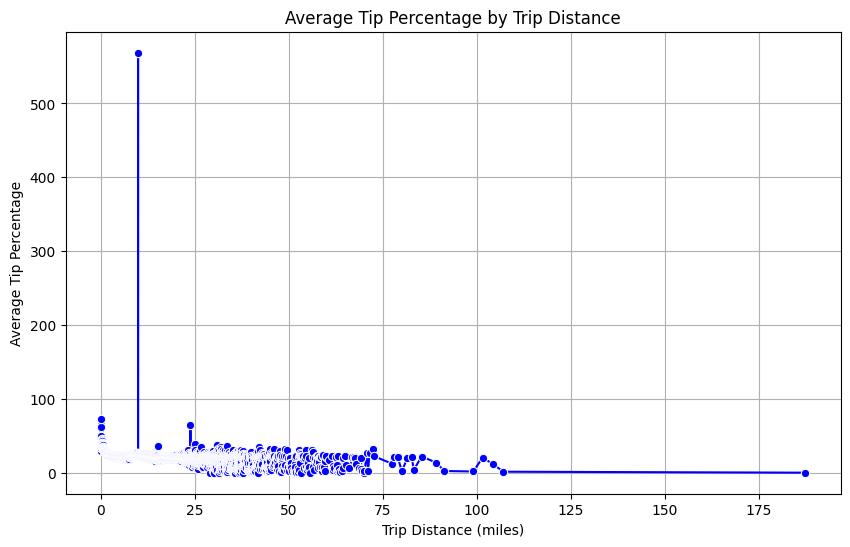

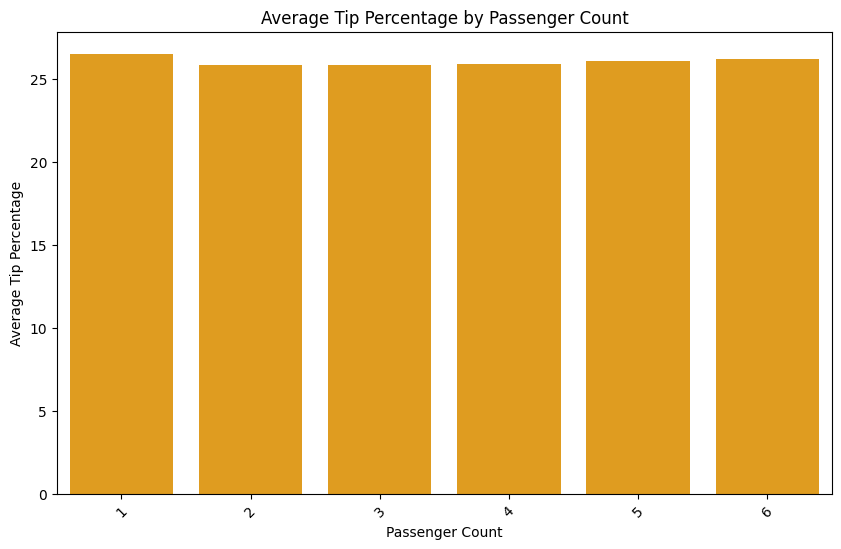

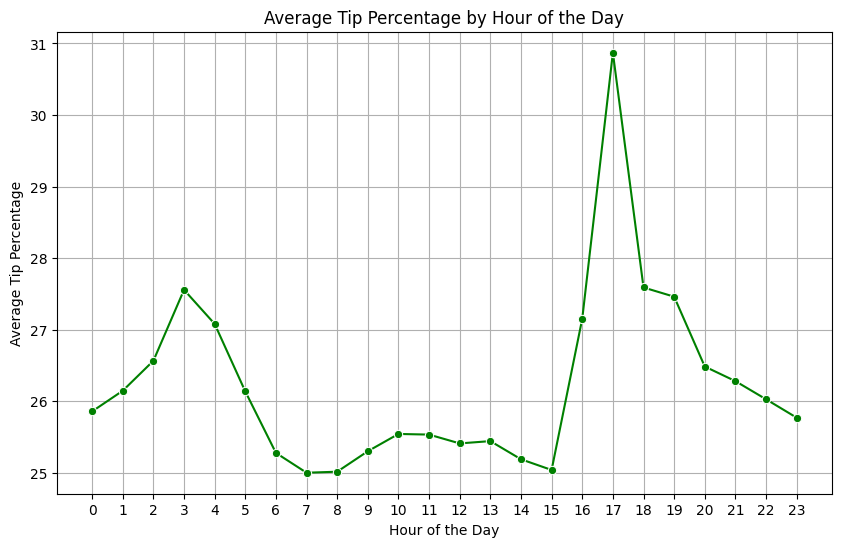

In [170]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df['tip_percentage_derived'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

avg_tip_by_distance = merged_df.groupby('trip_distance')['tip_percentage_derived'].mean().reset_index()

avg_tip_by_passenger_count = merged_df.groupby('passenger_count')['tip_percentage_derived'].mean().reset_index()


avg_tip_by_hour = merged_df.groupby('pickup_time_derived')['tip_percentage_derived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_tip_by_distance, x='trip_distance', y='tip_percentage_derived', marker='o', color='blue')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_tip_by_passenger_count, x='passenger_count', y='tip_percentage_derived', color='orange')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_tip_by_hour, x='pickup_time_derived', y='tip_percentage_derived', marker='o', color='green')
plt.title('Average Tip Percentage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(24))
plt.grid(True)
plt.show()

* Chart1 shows that as the trip distance increases, the average tip percentage generally decreases. This could indicate that passengers
 are less inclined to tip a higher percentage for longer trips, possibly due to the higher total cost of the trip.
* Chart2 suggests that the number of passengers in a trip affects the average tip percentage. It appears that trips with fewer passengers
 tend to have a higher tip percentage. This might be because individual passengers are more likely to tip generously when they are alone or in
 smaller groups.
* Chart3 indicates that the time of day also influences tipping behavior. The average tip percentage peaks during certain hours, possibly
 during peak travel times or late-night hours when passengers might be more generous. There is a noticeable variation in tip percentages
 throughout the day, suggesting that time of day is a significant factor in tipping behavior

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

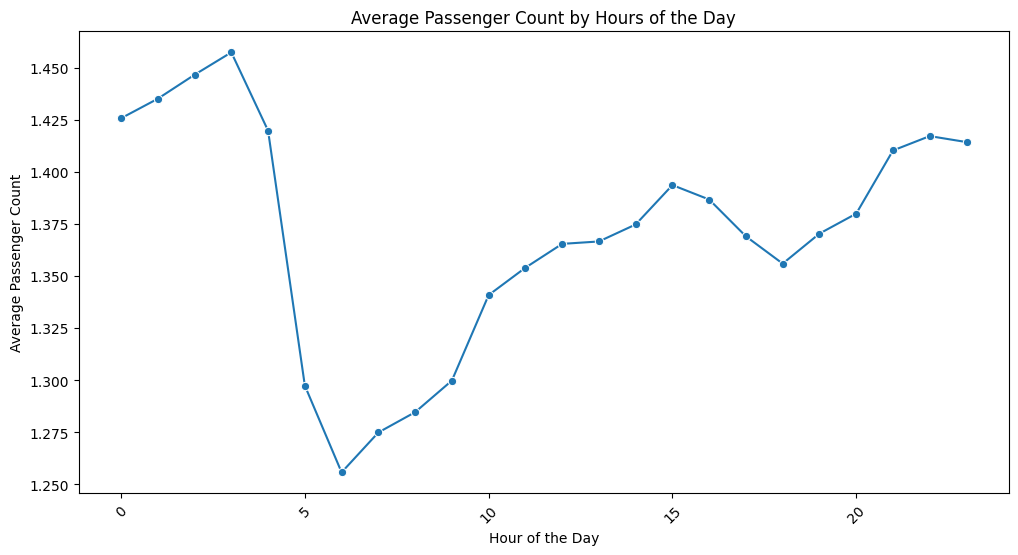

In [111]:
merged_df['pickup_day_name_derived'] = pd.to_datetime(merged_df['tpep_pickup_datetime']).dt.day_name()

avg_passenger_count_by_hour = merged_df.groupby('pickup_time_derived')['passenger_count'].mean().reset_index()
avg_passenger_count_by_day = merged_df.groupby('pickup_day_name_derived')['passenger_count'].mean().reset_index()

custom_line_plot(
    avg_passenger_count_by_hour['pickup_time_derived'],
    avg_passenger_count_by_hour['passenger_count'],
    'Average Passenger Count by Hours of the Day',
    'Hour of the Day',
    'Average Passenger Count'
)

custom_bar_plot(
    avg_passenger_count_by_day['pickup_day_name_derived'],
    avg_passenger_count_by_day['passenger_count'],
    'Average Passenger Count by Day of the Week',
    'Day of the Week',
    'Average Passenger Count',
    show_data_labels=True
)

- The highest average passenger count is around 03:00 AM and the lowest average passenger count is around 06:00 AM
- The highest average passenger count is on Saturday and the lowest average passenger count is on Monday

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

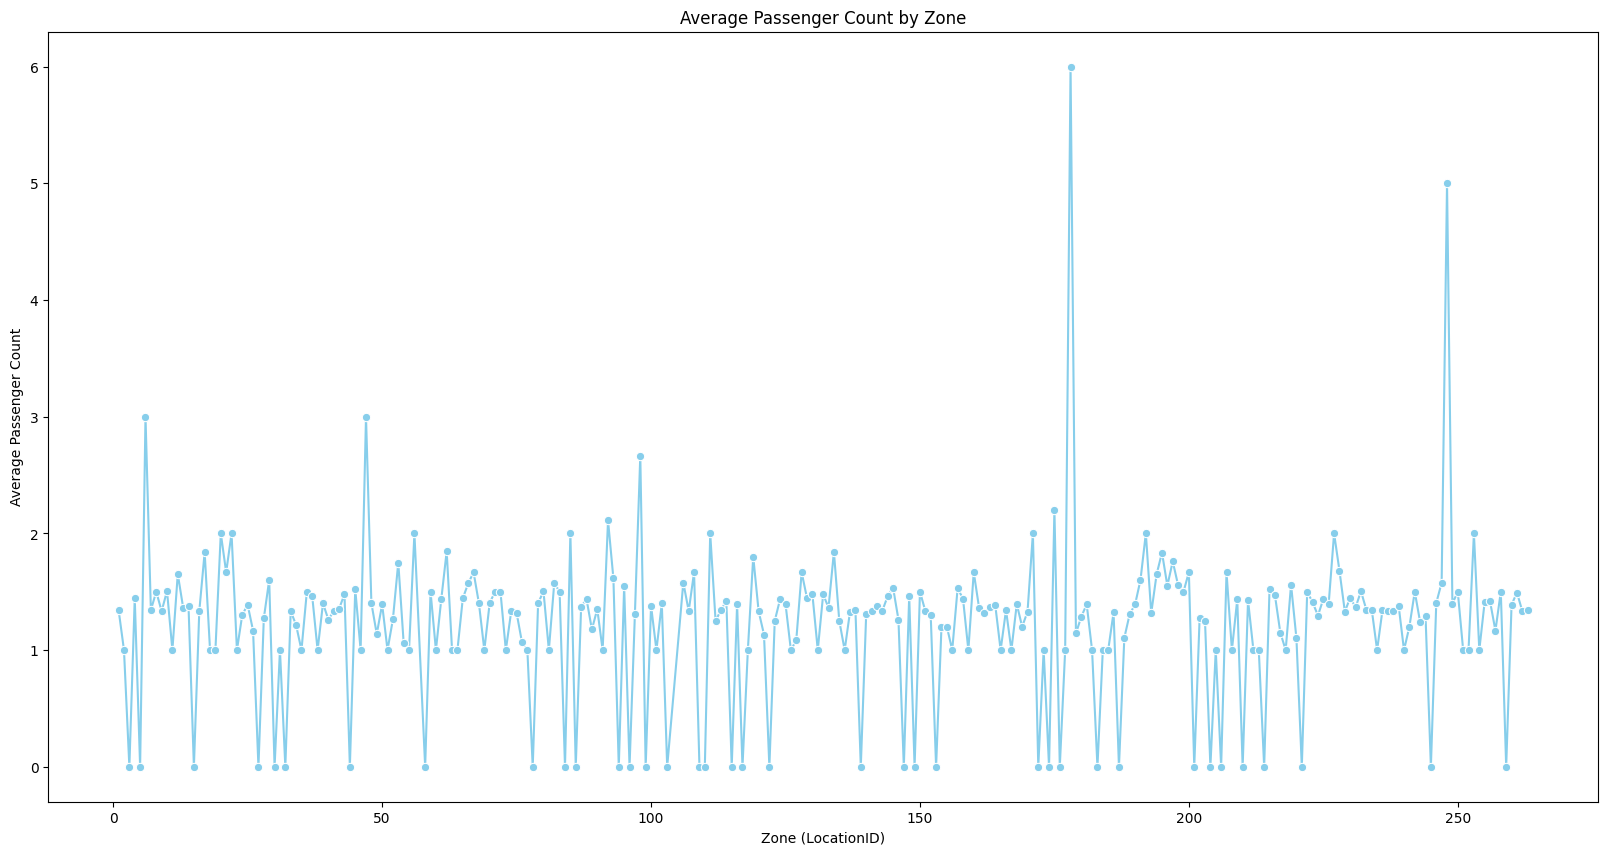

In [113]:
# How does passenger count vary across zones
avg_passenger_count_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
zones_with_passenger_count = zones.merge(avg_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_passenger_count['passenger_count'].fillna(0, inplace=True)
plt.figure(figsize=(20, 10))
sns.lineplot(data=zones_with_passenger_count, x='LocationID', y='passenger_count', marker='o', color='skyblue')
plt.title('Average Passenger Count by Zone')
plt.xlabel('Zone (LocationID)')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, len(zones_with_passenger_count['LocationID']), 50))
plt.show()

Top 15 Zones by Average Passenger Count:
pickup_zone
Ocean Parkway South        6.00
West Farms/Bronx River     5.00
Claremont/Bathgate         3.00
Arrochar/Fort Wadsworth    3.00
Fresh Meadows              2.50
Oakland Gardens            2.20
Flushing                   2.11
Queensboro Hill            2.00
Corona                     2.00
Sunset Park East           2.00
Erasmus                    2.00
Belmont                    2.00
Murray Hill-Queens         2.00
Bensonhurst West           2.00
Willets Point              2.00
Name: passenger_count, dtype: float64


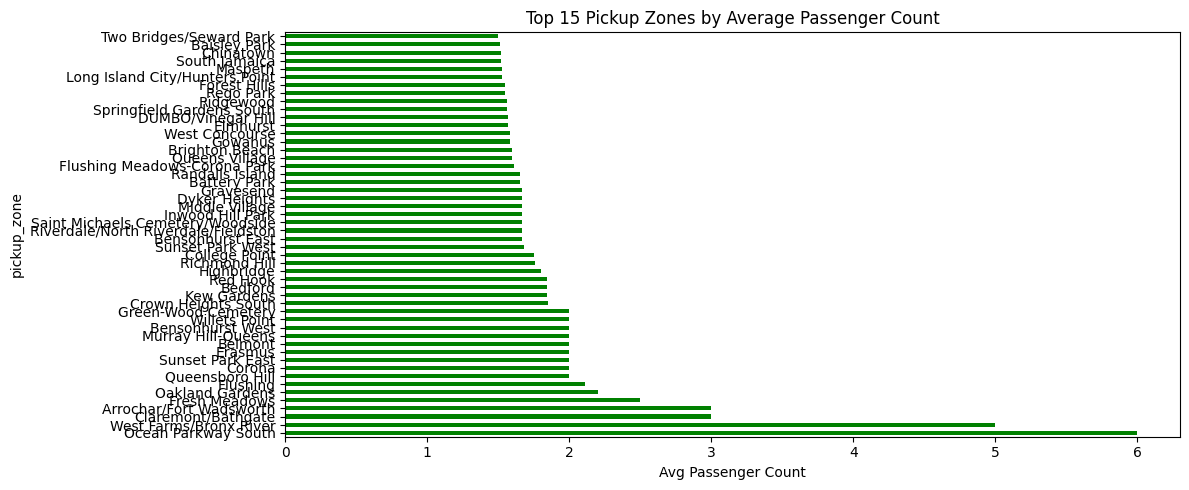

In [175]:
passenger_by_zone = df_zones.groupby('pickup_zone')['passenger_count'].mean().sort_values(ascending=False).round(2)

# Show top 10 zones by average passenger count
print("Top 15 Zones by Average Passenger Count:")
print(passenger_by_zone.head(15))

passenger_by_zone.head(50).plot(kind='barh', figsize=(12, 5), color='green')
plt.title("Top 15 Pickup Zones by Average Passenger Count")
plt.xlabel("Avg Passenger Count")
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [176]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'congestion_surcharge', 'airport_fee_combined', 'improvement_surcharge']
surcharge_frequencies = merged_df[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()
surcharge_frequencies.columns = ['Surcharge', 'Frequency']
print("Frequency of each surcharge:")
print(surcharge_frequencies)

Frequency of each surcharge:
               Surcharge  Frequency
0                  extra     897687
1   congestion_surcharge    1341479
2   airport_fee_combined     116158
3  improvement_surcharge    1412914


In [177]:
pickup_surcharge_zones = merged_df[merged_df[surcharge_columns].sum(axis=1) > 0].groupby('PULocationID').size().reset_index(name='surcharge_count')
pickup_surcharge_zones = pickup_surcharge_zones.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left').sort_values(by='surcharge_count', ascending=False)
print("Top pickup zones with surcharges:")
print(pickup_surcharge_zones.head(10))

Top pickup zones with surcharges:
     PULocationID  surcharge_count  LocationID                          zone
200           237            69858       237.0         Upper East Side South
135           161            67729       161.0                Midtown Center
199           236            63695       236.0         Upper East Side North
110           132            63639       132.0                   JFK Airport
136           162            52690       162.0                  Midtown East
116           138            51616       138.0             LaGuardia Airport
119           142            48921       142.0           Lincoln Square East
156           186            48582       186.0  Penn Station/Madison Sq West
193           230            44372       230.0     Times Sq/Theatre District
144           170            43163       170.0                   Murray Hill


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

- Increase cab deployment during daytime peak hours (6 AM – 10 PM) and night hours (11 PM – 5 AM), especially in zones identified with high trip volumes during those periods, to meet customer demand efficiently.
- Leverage real-time traffic data to dynamically reroute cabs, minimizing travel delays, improving fuel efficiency, and maintaining punctual service during congested periods.
- Introduce dynamic pricing that adjusts fares based on hourly demand and day-of-week patterns, and apply surge pricing in high-demand zones during peak daytime and weekend nights to maximize revenue.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- Position more cabs in the high-demand zones during peak times to reduce wait times and improve customer satisfaction.
- Deploy more cabs on weekdays during peak hours 

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

- Offer discounts on non-peak hours to encourage ridership
- Encourage ridership by offering discounted fares or incentives in low-demand or underserved locations.
- Implement seasonal adjustments during holidays and adverse weather conditions to meet increased demand and maintain service reliability.
- Leverage Machine learning to predict demand in areas, this will help in proactive dispatch of cabs